Using TensorFlow backend.


11354112/11490434 [============================>.] - ETA: 0s(50000, 28, 28) (50000,)


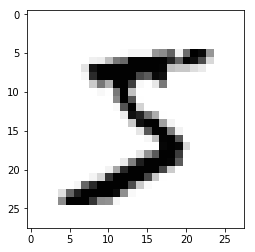

In [1]:
from preprocessed_mnist import load_dataset
X_train, y_train, X_val, y_val, X_test, y_test = load_dataset()
print(X_train.shape, y_train.shape)
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(X_train[0], cmap="Greys");

step 0, test accuracy 0.0994
step 1000, test accuracy 0.9351
step 2000, test accuracy 0.9483
step 3000, test accuracy 0.9497
step 4000, test accuracy 0.9629
step 5000, test accuracy 0.966
step 6000, test accuracy 0.9641
step 7000, test accuracy 0.9706
step 8000, test accuracy 0.9677
step 9000, test accuracy 0.9706
step 10000, test accuracy 0.9714
step 11000, test accuracy 0.974
step 12000, test accuracy 0.9734
step 13000, test accuracy 0.9748
step 14000, test accuracy 0.9728
step 15000, test accuracy 0.9775
step 16000, test accuracy 0.9756
step 17000, test accuracy 0.9742
step 18000, test accuracy 0.9766
step 19000, test accuracy 0.9775
step 20000, test accuracy 0.975
step 21000, test accuracy 0.9786
step 22000, test accuracy 0.9778
step 23000, test accuracy 0.9774
step 24000, test accuracy 0.979
step 25000, test accuracy 0.9771
step 26000, test accuracy 0.9784
step 27000, test accuracy 0.979
step 28000, test accuracy 0.9776
step 29000, test accuracy 0.9777
step 30000, test accuracy 0.

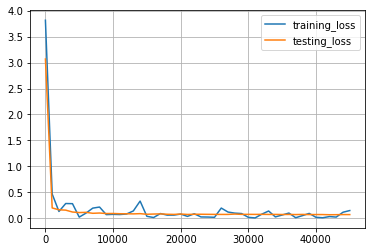

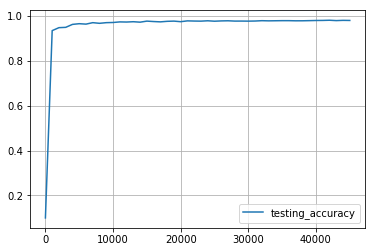

In [14]:
inputSize = X_train.shape[1]*X_train.shape[2]
hidden1 = 100
hidden2 = 80
hidden3 = 40
hidden4 = 10
batchSize = 50

import tensorflow as tf
import numpy as np

def weight_variable(shape):
  initial = tf.truncated_normal(shape, stddev=0.2)
  return tf.Variable(initial)

def bias_variable(shape):
  initial = tf.constant(0.1, shape=shape)
  return tf.Variable(initial)

s = tf.InteractiveSession()

# placeholders and variables
x = tf.placeholder(tf.float32, [None, inputSize])
W1 = weight_variable([inputSize, hidden1])
b1 = bias_variable([hidden1])
W2 = weight_variable([hidden1, hidden2])
b2 = bias_variable([hidden2])
W3 = weight_variable([hidden2, hidden3])
b3 = bias_variable([hidden3])
W4 = weight_variable([hidden3, hidden4])
b4 = bias_variable([hidden4])

y_ = tf.placeholder(tf.int32, [None])

keep_prob = tf.placeholder(tf.float32)

global_step = tf.Variable(0, trainable=False)

s.run(tf.global_variables_initializer())

# model
nonlin1 = tf.nn.elu(tf.matmul(x, W1)+b1)
nonlin1_drop = tf.nn.dropout(nonlin1, keep_prob)
nonlin2 = tf.nn.elu(tf.matmul(nonlin1_drop, W2)+b2)
#nonlin2_drop = tf.nn.dropout(nonlin2, keep_prob)
nonlin3 = tf.nn.elu(tf.matmul(nonlin2, W3)+b3)
#nonlin3_drop = tf.nn.dropout(nonlin3, keep_prob)
y = tf.matmul(nonlin3, W4)+b4

# loss function
oneHotLabels = tf.one_hot(tf.cast(y_, tf.uint8), 10)
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=oneHotLabels, logits=y))

starter_learning_rate = 0.1
learning_rate = tf.train.exponential_decay(starter_learning_rate, global_step, 2000, 0.96, staircase=True)

#training
train_step = tf.train.GradientDescentOptimizer(learning_rate).minimize(cross_entropy, global_step=global_step)
correct_prediction = tf.equal(tf.cast(tf.argmax(y,1), tf.int32), y_)
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))


###############################################

X_train_flatten = X_train.reshape(X_train.shape[0], -1)
X_test_flatten = X_test.reshape(X_test.shape[0], -1)
y_train = y_train.astype(int)
y_test = y_test.astype(int)

# for plotting
iterations = []
training_loss = []
testing_loss = []
testing_accuracy = []

for i in range(45001):
    # random samples
    permutation=np.random.permutation(y_train.shape[0])
    permutation=permutation[0:batchSize]
    batch=[X_train_flatten[permutation], y_train[permutation]]
    
    _, loss = s.run([train_step, cross_entropy], feed_dict={x:batch[0], y_:batch[1], keep_prob:0.7})

    # store numbers for plotting
    if i%1000 == 0:
        testloss = s.run(cross_entropy, feed_dict={x: X_test_flatten, y_: y_test, keep_prob:1})
        acc = accuracy.eval(feed_dict={x: X_test_flatten, y_: y_test, keep_prob:1})
        iterations.append(i)
        training_loss.append(loss)
        testing_loss.append(testloss)
        testing_accuracy.append(acc)
    
    # print progress
    if i%1000 == 0:
        #train_accuracy = accuracy.eval(feed_dict={x:batch[0], y_:batch[1], keep_prob:1})
        print('step %d, test accuracy %g' % (i, acc))

# plot losses
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(0)
plt.plot(iterations, training_loss, label='training_loss')
plt.plot(iterations, testing_loss, label='testing_loss')
plt.grid()
plt.legend()

plt.figure(1)
plt.plot(iterations, testing_accuracy, label='testing_accuracy')
plt.grid()
plt.legend()